# Mahsa Massoud
## AI- CA3 - 810098032

In this assignment, we want to predict categories of books , enlisting the helping hand of Najve bayes.
Necessary libraries like, pandas, matplotlib, hazm,etc have been installed.


In [53]:
!pip install hazm

In [54]:
from __future__ import unicode_literals
from hazm import *
import pandas as pd 


In [55]:
train_df = pd.read_csv("books_train.csv")
test_df = pd.read_csv("books_test.csv")
train_df.head(10)

,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی
5,خارج از خط,«خارج از خط» مجموعه داستان کوتاهی نوشته محمود ...,داستان کوتاه
6,لاک صورتی,«لاک صورتی» نوشته جلال آل احمد(۱۳۴۸-۱۳۰۲) نویس...,داستان کوتاه
7,راهبردهای سرمایه گذاری کسب و کار,راه‌های بسیار زیادی برای سرمایه‌گذاری در دنیا ...,مدیریت و کسب و کار
8,تحلیل گفتمان و نظرات رسانه‌های بریتانیا: چهره‌...,با شکل‌گیری و رشد روز افزون دهکده جهانی، بشر ب...,کلیات اسلام
9,رویکردی جدید به اختلالات مصرف مواد و مشاوره‌ی ...,«رویکردی جدید به اختلالات مصرف مواد و مشاوره‌ی...,جامعه‌شناسی


Obviously we have 5 categories for book, each has 2550 words.

In [56]:
train_df.describe()

,title,description,categories
count,2550,2550,2550
unique,2502,2535,6
top,اثر مرکب,ماجراهای هنک در مورد پسری بازیگوش به نام هنک ا...,جامعه‌شناسی
freq,3,3,425


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2550 non-null   object
 1   description  2550 non-null   object
 2   categories   2550 non-null   object
dtypes: object(3)
memory usage: 59.9+ KB


In [58]:
import hazm
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In this part, we want to preprocess the data in a suitable order. 
First we normalize each row of text( title+ description of each book) by hazm.Normalizer. Then we make a list of stopwords of punctuations and also some words which occured enormously in more than one categories not only didn't they give us additional information but also they may cause some problems. we ignore the list of stopwords then make a new column , namly Words, which had been evolved from Lemmatizer method, giving us a list of lemmatized worf for each book.
This word_tokenize() is a function which breaks a sentence into a list of it's words .



In [59]:
def preprocessTextofColumn(columnName , dataframe):
    normalizer = hazm.Normalizer()
    tokenizer = hazm.WordTokenizer()
    lemmatizer = hazm.Lemmatizer()
    StopWords = set(hazm.utils.stopwords_list())
    StopWords = StopWords.union({'کتاب','داستان', 'زندگی','توانستن#توان' ,'کرد#کن' , '؟',':','...', '....' , 'ی','ای',',','،','(',')',':',';','-','_','.','/','+','=','?','\r','\n' ,'[',']' ,'؛' , '«', '»','…', '"' ,'!','#'})
    commons ={'سر','شد#شو','کتاب','داستان', 'زندگی', 'کرد#کن' , '؟' , 'توانست#توان',  'خواند#خوان' ,'زد#زن' ,'گفت#گو', 'جلد','داشت#دار' , 'رفت#رو'}
    allWords = []
    for i in range(dataframe.shape[0]):
        text = dataframe.loc[i]['title'] + ' ' + dataframe.loc[i][columnName]
        normalizedText = normalizer.affix_spacing(text)
        words = tokenizer.tokenize(normalizedText)
        filteredWords = []
        for word in words:
            lamm = lemmatizer.lemmatize(word.lower())
            if (word not in StopWords) and (word not in commons) and (lamm not in StopWords) and (lamm not in commons) :
                filteredWords.append(lamm)
        allWords.append(filteredWords)
    newColumnName = 'Words'
    dataframe[newColumnName] = allWords
    return dataframe

In [60]:
new_df = preprocessTextofColumn('description' , train_df)

In [61]:
new_df

,title,description,categories,Words
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی,"[ساختار, نظریه, جامعه‌شناس, ایران, ساختار, نظر..."
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی,"[جامعه, فرهنگ, کانادا, جامعه, فرهنگ, کانادا, م..."
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام,"[پرسش, موعود, پرسش, مختلف, شخصیت, امام, مهدی, ..."
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان,"[موج, دریا, موج, دریا, قلم, مهر, ماهوت, ۱۳۴۰, ..."
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی,"[پرسش, غرب, پرسش, غرب, قلم, دکتر, اسماعیل, شفی..."
...,...,...,...,...
2545,قضاوت‌‏های امیرمؤمنان حضرت علی علیه‏‌السلام,آنچه به عنوان قضاوت‌های امیرمؤمنان حضرت علی عل...,کلیات اسلام,"[قضاوت‌‏های, امیرمؤمنان, حضرت, علی, علیه‏‌السل..."
2546,کراماتی از مهدی موعود(عج),زینب محمودی پژوهشگر دینی است.\r\nدر بخشی از پی...,کلیات اسلام,"[کرامات, مهدی, موعود, عج, زینب, محمود, پژوهشگر..."
2547,انتقام، انتقام، انتقام,«انتقام، انتقام، انتقام» داستان‌گونه‌ای با زبا...,داستان کوتاه,"[انتقام, انتقام, انتقام, انتقام, انتقام, انتقا..."
2548,آن مرد می‌آید,«آن مرد می‌آید» به قلم سیده‌فاطمه موسوی و به ت...,داستان کودک و نوجوانان,"[مرد, مرد, قلم, سیده‌فاطمه, موسوی, تصویرگر, جع..."


In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2550 non-null   object
 1   description  2550 non-null   object
 2   categories   2550 non-null   object
 3   Words        2550 non-null   object
dtypes: object(4)
memory usage: 79.8+ KB


# 1:
Lemmetizer gives us Bon-e-Maazi and Bon-e-Mozare of a verb in Farsi. Two verbs having the same Bon mostly have the same concept in a sentence and assumed same.On the other hand, Stemmer is not the state-of-the-art. In some words like 'taha', this method assume that 'Ha' ath the end of the word , is an indicator of a group of Ta s(!) which is obvioulsy incorrect. 


In [63]:
normalizer = hazm.Normalizer()
tokenizer = hazm.WordTokenizer()
lemmatizer = hazm.Lemmatizer()
stemmer = Stemmer()
print(lemmatizer.lemmatize('می خواهم'))
print(lemmatizer.lemmatize('رفتیم'))
print(lemmatizer.lemmatize('نوشتند'))
print(lemmatizer.lemmatize('طاها'))
print(lemmatizer.lemmatize('رفتم'))

می خواهم
رفت#رو
نوشت#نویس
طاها
رفت#رو


In [64]:
print(stemmer.stem('رفتم'))
print(stemmer.stem('کتاب ها'))
print(stemmer.stem('طاها'))
print(stemmer.stem('درختان'))
print(stemmer.stem('بسیار'))

رف
کتاب 
طا
درخ
بسیار


# 2:
$$ p(c|x) = \frac{p(x|c)p(c)}{p(x)} $$

in the formula above, x is the word appearance, c is the book category and  we have:

$$ p(c|x) = p(x_1|c).p(x_2|c)...p(x_n|c).p(c) $$


$P(x|c)$ is the probability of seeing word x in a book category's description of type c **(Likelihood)**

$P(c|x)$ : is the probability of the current book category being c knowing that the word x has appeared in the title. **(Posterior)**

$P(c)$ is the probability of seeing a book with category c which is equal for all categories. **(Class Prior Probability)**

$P(x)$ is the probability of seeing a word **(Predictor Prior Probability)**

Also we may have some determined conditional variables which are our indicator, in this assignment, the books are most frequent in each categories. **(Evidence)**



# 3:
**Bigrams** could also be used to increase accuracy. Here we only consider a word by itself without paying attention to its adjacent word.(**Unigrams**)

1:
1-1- این شال به رنگ سبز سیر است.
1-2- من سیر هستم و ناهار نمی خورم.


In the first sentence, the word سیر means the density of a color but oj the second sentece, it means not hungry.Therefore, these two sentences have completely different concepts and are from different categories.

2 :
2-1 - علی خانه را ترک کرد
2-2- این دیوار دارای ترک است.
2-3 - او از نژاد ترک است.
All these three senctences , have the word ترک , but each one has a diffrent pronounciation which brings about different meanings.

in these sentences , we need more than 2 adjacent words to classify the sentence correctly( trigram or more).

# 4:

In case that there is word contained only one type of category, Naive Bayes will definetly choose that category as the answer which might be wrong in some cases.
If a word in a book does not be in its category , its joint probability with other word on that category will be 0 and in consequence the similarity between other words will be ignored which is not fruitful.
It is good to be mentioned that we use the sum of logs instead of productions.





# 5:
For words which are not in the group words of a category, we shoulf consider a minimum amount so they will not destroy other joint probabilities. in The additive smoothing we have :
$$ \frac{x_i + \alpha}{N + \alpha.D} $$
 instead of : $$ \frac{x_i }{N}$$
 
 N is the total words, D is the number of distinct words in a category and  $\alpha$ is  a positive constant(here 0.1)
 so that porportion will not be zero at all and we can observe that our accuracy rechas to more than 80  percent. 
 This is because the fact that wee have many words in the test dataset which are not seen before on the same category in train dataset, is so probable.

In [65]:
novel_title = dict()
sociology_title = dict()
islamic_title = dict()
short_story_title = dict()
kids_title = dict()
business_title = dict()

total_novel_title =total_sociology_title = total_islamic_title =total_short_story_title = total_kids_title =total_business_title= 0


for index, row in new_df.iterrows():
    tokens = row['Words']
    for token in tokens:
        word = lemmatizer.lemmatize(token)
            
        cat = row['categories']

        if (cat == 'رمان'):
            if(word in novel_title.keys()):
                novel_title[word]+= 1
            else:
                novel_title[word] = 1
            total_novel_title += 1

        if (cat == 'جامعه‌شناسی'):
            if(word in sociology_title.keys()):
                sociology_title[word]+= 1
            else:
                sociology_title[word] = 1
            total_sociology_title += 1

        if (cat == 'کلیات اسلام'):
            if(word in islamic_title.keys()):
                islamic_title[word]+= 1
            else:
                islamic_title[word] = 1
            total_islamic_title += 1

        if (cat == 'داستان کوتاه'):
            if(word in short_story_title.keys()):
                short_story_title[word]+= 1
            else:
                short_story_title[word] = 1
            total_short_story_title += 1

        if (cat == 'داستان کودک و نوجوانان'):
            if(word in kids_title.keys()):
                kids_title[word]+= 1
            else:
                kids_title[word] = 1
            total_kids_title += 1

        if (cat == 'مدیریت و کسب و کار'):
            if(word in business_title.keys()):
                business_title[word]+= 1
            else:
                business_title[word] = 1
            total_business_title += 1


In [66]:
!pip install arabic-reshaper
!pip install python-bidi
import arabic_reshaper
from bidi.algorithm import get_display

In [67]:
def to_arabic(text):
    return get_display(
      arabic_reshaper.reshape(u'%s' % text)
  )

# 6:

In [68]:
from matplotlib import pyplot as plt


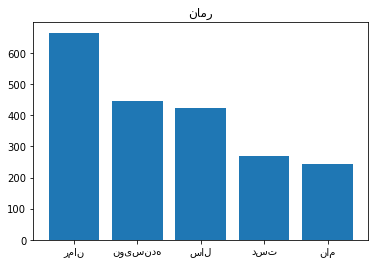

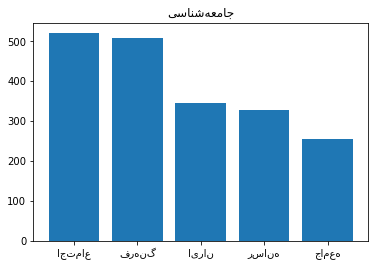

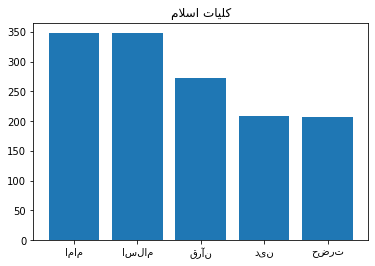

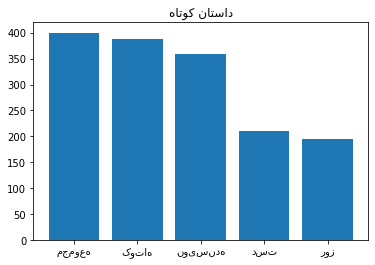

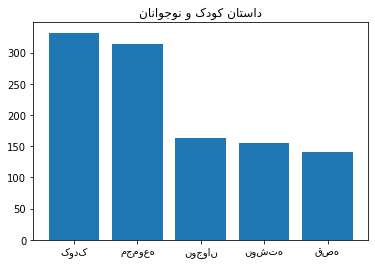

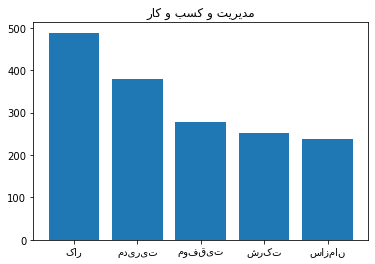

In [69]:
ll = [novel_title ,
sociology_title ,
islamic_title,
short_story_title ,
kids_title ,
business_title]
cats = ['رمان', 'جامعه‌شناسی', 'کلیات اسلام', 'داستان کوتاه', 'داستان کودک و نوجوانان', 'مدیریت و کسب و کار']
for i in range(len(ll)):
    srtd = dict(sorted(ll[i].items(), key = lambda item: item[1], reverse = True)[:5])
    plt.bar(srtd.keys() , srtd.values())
    plt.title(to_arabic(cats[i]))
    plt.show()
    

In [70]:
test_df

,title,description,categories
0,کآشوب,«کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...,داستان کوتاه
1,داستان‌های برق‌آسا,«داستان‌های برق‌آسا» نام مجموعه داستان‌هایی به...,داستان کوتاه
2,بحثی درباره مرجعیت و روحانیت,مجموعه مقالات «بحثی درباره مرجعیت و روحانیت» ش...,کلیات اسلام
3,قلعه‌ی حیوانات,«قلعه‌ی حیوانات» جورج اورول، درباره گروهی از ح...,رمان
4,قصه ما مثل شد (۱),«قصه ما مثل شد» یک مجموعه کتاب ۵ جلدی است که د...,داستان کودک و نوجوانان
...,...,...,...
445,سیره اقتصادی امام علی (ع),«سیرۀ اقتصادی امام علی (ع)» نوشته سید رضا حسین...,کلیات اسلام
446,تفنگ پدر بر بام‌های تهران,از روی بام رفته بودیم بر بامی دیگر و رسیده بود...,رمان
447,اصالت من,«اصالت من» نوشته داریوش قاسمیان دستجردی(۱۳۳۹) ...,جامعه‌شناسی
448,تأمین مالی آموزش و پرورش در ایران,تأمین مالی آموزش و پرورش عمومی فرآیندی است که ...,جامعه‌شناسی


In [71]:
import operator
stats = {'a':1000, 'b':3000, 'c': 100, 'd':3000}
key , value = max(stats.items(), key=operator.itemgetter(1))
stats[key]

3000

In [72]:
catts = ['رمان', 'جامعه‌شناسی', 'کلیات اسلام', 'داستان کوتاه', 'داستان کودک و نوجوانان', 'مدیریت و کسب و کار']
def getCat(a,b):
    if(b ==1):
        return catts.index(a)
    else:
        return catts[a]

StopWords = set(hazm.utils.stopwords_list())
StopWords = StopWords.union({'کتاب', 'زندگی','توانستن#توان' ,'کرد#کن' , '؟',':','...', '....' , 'ی','ای',',','،','(',')',':',';','-','_','.','/','+','=','?','\r','\n' ,'[',']' ,'؛' , '«', '»','…', '"' ,'!','#'})
commons ={'سر','شد#شو','کتاب','داستان', 'زندگی', 'کرد#کن' , '؟' , 'توانست#توان',  'خواند#خوان' ,'زد#زن' ,'گفت#گو', 'جلد','داشت#دار' , 'رفت#رو'}
commons = commons.union(StopWords)


from math import log

neg_inf = -500 

def calcProbsWithoutSmoothing(phrase):
    phrase = normalizer.affix_spacing(phrase)
    tokens = word_tokenize(phrase)

    categories = {'novel_cnt':0 ,  'social_cnt' :0 ,'kid_cnt' :0 , 'sstory_cnt' :0 , 'islam_cnt' :0 ,  'business_cnt' : 0}
    indexes = {'novel_cnt':0 ,  'social_cnt' :1 ,'kid_cnt' :2 , 'sstory_cnt' :3 , 'islam_cnt' :4 ,  'business_cnt' : 5}

    for token in tokens:

        word = lemmatizer.lemmatize(token)

        if (word not in commons):
#             continue
            

            if (word in novel_title):
                categories['novel_cnt']+= log((novel_title[word]) / (total_novel_title))
            else:
                categories['novel_cnt']+= neg_inf 


            if (word in sociology_title):
                categories['social_cnt'] += log((sociology_title[word]) / (total_sociology_title)) 
            else:
                categories['social_cnt'] += neg_inf 


            if (word  in islamic_title):
                categories['kid_cnt'] += log((islamic_title[word]) / (total_islamic_title)) 
            else:
                categories['kid_cnt'] += neg_inf 


            if (word in short_story_title):
                categories['sstory_cnt'] += log((short_story_title[word]) / (total_short_story_title)) 
            else:
                categories['sstory_cnt'] += neg_inf 


            if (word in kids_title):
                categories['islam_cnt'] += log((kids_title[word]) / (total_kids_title)) 
            else:
                categories['islam_cnt'] += neg_inf 


            if (word in business_title):
                categories['business_cnt'] += log((business_title[word]) / (total_business_title)) 
            else:
                categories['business_cnt'] += neg_inf
            
            key , value = max(categories.items(), key=operator.itemgetter(1))
    return indexes[key] , value

cc = []
dd = []

tp = [0, 0, 0, 0, 0, 0]
fp = [0, 0, 0, 0, 0, 0]
fn = [0, 0, 0, 0, 0, 0]
correct = 0

for index, row in test_df.iterrows():
    
    detect , mx = calcProbsWithoutSmoothing(row['description'])
    dd.append(detect)
    category = getCat(row['categories'] ,1)
    cc.append(category)
    if(category == detect):
        correct+=1

        tp[detect] += 1
    else:
        fp[detect] += 1
        fn[category] += 1

f1_sum =0
per_sum =0
rec_sum =0


print("Accuracy is ", correct / len(test_df))

for i in range(6):
    num = tp[i]
    denum_1 = tp[i] + fp[i]
    denum_2 = tp[i] + fn[i]
    precision = num / denum_1
    recall = num / denum_2
    f1 = 2 *( precision * recall) / (precision + recall)
    f1_sum += f1
    per_sum +=precision
    rec_sum +=recall
    print("category : ", getCat(i,22))
    print("True Positive : ", tp[i])
    print("False Positive : ", fp[i])
    print("False Negative : ", fn[i])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print('\n')
    

Accuracy is  0.6822222222222222
category :  رمان
True Positive :  60
False Positive :  60
False Negative :  15
Precision: 0.5
Recall: 0.8
F1-score: 0.6153846153846154


category :  جامعه‌شناسی
True Positive :  63
False Positive :  39
False Negative :  12
Precision: 0.6176470588235294
Recall: 0.84
F1-score: 0.711864406779661


category :  کلیات اسلام
True Positive :  57
False Positive :  3
False Negative :  18
Precision: 0.95
Recall: 0.76
F1-score: 0.8444444444444444


category :  داستان کوتاه
True Positive :  35
False Positive :  33
False Negative :  40
Precision: 0.5147058823529411
Recall: 0.4666666666666667
F1-score: 0.4895104895104895


category :  داستان کودک و نوجوانان
True Positive :  43
False Positive :  4
False Negative :  32
Precision: 0.9148936170212766
Recall: 0.5733333333333334
F1-score: 0.7049180327868853


category :  مدیریت و کسب و کار
True Positive :  49
False Positive :  4
False Negative :  26
Precision: 0.9245283018867925
Recall: 0.6533333333333333
F1-score: 0.765625


In [73]:
print("precision sum:", per_sum)
print("recall sum:", rec_sum)
print("f1-score sum:", f1_sum)


precision sum: 4.42177486008454
recall sum: 4.093333333333334
f1-score sum: 4.131746988906096


In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(cc, dd))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        75
           1       0.62      0.84      0.71        75
           2       0.95      0.76      0.84        75
           3       0.51      0.47      0.49        75
           4       0.91      0.57      0.70        75
           5       0.92      0.65      0.77        75

    accuracy                           0.68       450
   macro avg       0.74      0.68      0.69       450
weighted avg       0.74      0.68      0.69       450



In [77]:
StopWords = set(hazm.utils.stopwords_list())
StopWords = StopWords.union({'کتاب', 'زندگی','توانستن#توان' ,'کرد#کن' , '؟',':','...', '....' , 'ی','ای',',','،','(',')',':',';','-','_','.','/','+','=','?','\r','\n' ,'[',']' ,'؛' , '«', '»','…', '"' ,'!','#'})
commons ={'سر','شد#شو','کتاب','داستان', 'زندگی', 'کرد#کن' , '؟' , 'توانست#توان',  'خواند#خوان' ,'زد#زن' ,'گفت#گو', 'جلد','داشت#دار' , 'رفت#رو'}
commons = commons.union(StopWords)

def calcProbsWithSmoothing(phrase):
    phrase = normalizer.affix_spacing(phrase)
    tokens = word_tokenize(phrase)
    categories = {'novel_cnt':0 ,  'social_cnt' :0 ,'kid_cnt' :0 , 'sstory_cnt' :0 , 'islam_cnt' :0 ,  'business_cnt' : 0}
    indexes = {'novel_cnt':0 ,  'social_cnt' :1 ,'kid_cnt' :2 , 'sstory_cnt' :3 , 'islam_cnt' :4 ,  'business_cnt' : 5}

    alpha = 0.1

    for token in tokens:

        word = lemmatizer.lemmatize(token)
        
        if (word not in commons):

            categories['novel_cnt'] += log((novel_title.get(word, 0) +  alpha) / (total_novel_title +  alpha * len(list(novel_title.keys()))))

            categories['social_cnt'] += log((sociology_title.get(word, 0) +  alpha) / (total_sociology_title +  alpha *len(list(sociology_title.keys()))))

            categories['kid_cnt'] += log((islamic_title.get(word, 0) +  alpha) / (total_islamic_title +  alpha * len(list(islamic_title.keys()))))

            categories['sstory_cnt']+= log((short_story_title.get(word, 0) +  alpha) / (total_short_story_title +  alpha * len(list(short_story_title.keys()))))

            categories['islam_cnt'] += log((kids_title.get(word, 0) +  alpha) / (total_kids_title +  alpha *len(list(kids_title.keys()))))

            categories['business_cnt'] += log((business_title.get(word, 0) +  alpha) / (total_business_title +  alpha * len(list(kids_title.keys()))))
            
            key , value = max(categories.items(), key=operator.itemgetter(1))
    return indexes[key] , value

tp = [0, 0, 0, 0, 0, 0]
fp = [0, 0, 0, 0, 0, 0]
fn = [0, 0, 0, 0, 0, 0]
correct = 0

misses = []
p_misses = []
cc = []
dd = []
import random
for index, row in test_df.iterrows():
    
    detect , mx = calcProbsWithSmoothing(row['description'])
    dd.append(detect)
    category = getCat(row['categories'] ,1)
    cc.append(category)
    if(category == detect):
        correct+=1
        tp[detect] += 1
    else:
        fp[detect] += 1
        fn[category] += 1
        
        misses.append(row)
        p_misses.append(detect)


    

In [78]:
f1_sum= 0
per_sum = 0
rec_sum = 0

print("Accuracy :", correct / len(test_df))

for i in range(6):
    num = tp[i]
    denum_1 = tp[i] + fp[i]
    denum_2 = tp[i] + fn[i]
    precision = num / denum_1
    recall = num / denum_2
    f1 = 2 *( precision * recall) / (precision + recall)
    f1_sum += f1
    per_sum +=precision
    rec_sum +=recall
    print("category : ", getCat(i,22))
    print("True Positive : ", tp[i])
    print("False Positive : ", fp[i])
    print("False Negative : ", fn[i])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print('\n')
    

Accuracy : 0.8155555555555556
category :  رمان
True Positive :  52
False Positive :  14
False Negative :  23
Precision: 0.7878787878787878
Recall: 0.6933333333333334
F1-score: 0.7375886524822695


category :  جامعه‌شناسی
True Positive :  65
False Positive :  17
False Negative :  10
Precision: 0.7926829268292683
Recall: 0.8666666666666667
F1-score: 0.8280254777070064


category :  کلیات اسلام
True Positive :  61
False Positive :  5
False Negative :  14
Precision: 0.9242424242424242
Recall: 0.8133333333333334
F1-score: 0.8652482269503545


category :  داستان کوتاه
True Positive :  53
False Positive :  22
False Negative :  22
Precision: 0.7066666666666667
Recall: 0.7066666666666667
F1-score: 0.7066666666666667


category :  داستان کودک و نوجوانان
True Positive :  66
False Positive :  18
False Negative :  9
Precision: 0.7857142857142857
Recall: 0.88
F1-score: 0.830188679245283


category :  مدیریت و کسب و کار
True Positive :  70
False Positive :  7
False Negative :  5
Precision: 0.90909090

In [79]:
print("precision sum:", per_sum)
print("recall sum:", rec_sum)
print("f1-score sum:", f1_sum)

precision sum: 4.906276000422341
recall sum: 4.8933333333333335
f1-score sum: 4.888770334630527


In [80]:
print(classification_report(cc, dd))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        75
           1       0.79      0.87      0.83        75
           2       0.92      0.81      0.87        75
           3       0.71      0.71      0.71        75
           4       0.79      0.88      0.83        75
           5       0.91      0.93      0.92        75

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.81       450
weighted avg       0.82      0.82      0.81       450



# 7 :
It can be seen that the "percision" of the "sociology" class is less than its "recall". The reason for this is that this classifier places a large number of test data books in the "sociology" category, but they are not related to it (so percision decreases). However, it does put a lot of books that belong to this category in the same category (so recall increases). In fact, it can be said that this classifier has some bias compared to that class. This reduces the accuracy of the classification.

In contrast, because the description words of each "islamic" can be found among the description words of each book, a number of "islamic" are mistakenly placed in another class, which reduces the coverage of this class. On the other hand, among the books he included in this class were an acceptable number of "islamics." Therefore, the classification percision  of this class is higher. Therefore, it can be said that the percision  and coverage values of each class alone are not sufficient to evaluate the model, and each shows a part of the model performance.

# 8 :

**F1 Score** is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it is better to look at both Precision and Recall.


$$F_{1} = 2.\frac{(Precision.Recall)}{Precision + Recall} = \frac{TP}{TP + \frac{FP + FN}{2}}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

# 9 : 
**Macro**:

Arithmetic mean of F-1 values of classes
Of course, in another case, we can first obtain the arithmetic mean of the class percision and the arithmetic mean of the class recall, and then synchronize the average value from these two values.

**Micro** :

Is equal to the same accuracy, ie the number of correct classifications divided by the total number of samples.

**Weighted** :

Weighted average values of F-1 classes in which the weight of each value can be considered as the ratio of the number of samples in that class to the total number of samples

# 10 :

**a) without additive smoothing:**

Macro: 


$$F_1 = \frac{0.61 + 0.71 + 0.84 + 0.48 + 0.70 + 0.76}{6} = 68.5\%$$

$$Precision = \frac{0.5 + 0.61 + 0.95 + 0.51 + 0.91 + 0.92}{6} = 73.33\%$$

$$Recall = \frac{0.8 + 0.84 + 0.76 + 0.46 + 0.57 + 0.65}{6} = 68\%$$

Micro :

$$Precision = \frac{TP_1 + TP_2 + TP_3 + TP_4 + TP_5 + TP_6}{TP_1 + FP_1 + TP_2 + FP_2 + TP_3 + FP_3 + TP_4 + FP_4 + TP_5 + FP_5 + TP_6 + FP_6}$$

$$ Precision  = 64.2\%$$



$$Recall = \frac{TP_1 + TP_2 + TP_3 + TP_4 + TP_5 + TP_6}{TP_1 + FN_1 + TP_2 + FN_2 + TP_3 + FN_3 + TP_4 + FN_4 + TP_5 + FN_5 + TP_6 + FN_6}$$


$$ Recall = 68.2\%$$

$$ F_1 = 2.\frac{(Precision.Recall)}{Precision + Recall} = 57.4\%$$

Weighted Average :

The number of samples of each category in the test dataset is 75 so the weighted average will be same as macro average.




**b) with additive smoothing:**

Macro: 


$$F_1 = \frac{0.73 + 0.82 + 0.86 + 0.70 + 0.83 + 0.92}{6} = 81\%$$

$$Precision = \frac{0.78 + 0.79 + 0.92 + 0.70 + 0.78 + 0.90}{6} = 81.16\%$$

$$Recall = \frac{0.69 + 0.86 + 0.81 + 0.70 + 0.88 + 0.93}{6} = 81.16\%$$

Micro :


$$ Precision  = 81.5\%$$


$$ Recall = 81.5\%$$

$$ F_1 = 2.\frac{(Precision.Recall)}{Precision + Recall} = 81.5\%$$

Weighted Average :

The number of samples of each category in the test dataset is 75 so the weighted average will be same as macro average.



# 11 :

we can observe that in the case which we use additive smoothing , all metrics rise highly.

In [81]:
print(classification_report(cc, dd))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        75
           1       0.79      0.87      0.83        75
           2       0.92      0.81      0.87        75
           3       0.71      0.71      0.71        75
           4       0.79      0.88      0.83        75
           5       0.91      0.93      0.92        75

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.81       450
weighted avg       0.82      0.82      0.81       450



In [82]:
m = pd.DataFrame(misses)
m.head(5)

,title,description,categories
0,کآشوب,«کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...,داستان کوتاه
5,اسلام و چالش اقتصادی,«اسلام و چالش اقتصادی» نوشته محمد عمر چپرا( ...,کلیات اسلام
8,چرا اقتصاد فرو می‌ریزد؟: به سوی نظریه‌ای عمومی...,«جوزف استیگلیتز» برنده جایزه نوبل اقتصاد در سا...,جامعه‌شناسی
12,زندانی قلعه‌ی قهقهه,رمان تاریخی «زندانی قلعه قهقهه» روایت‌گر سرگذش...,داستان کوتاه
20,فاطمه علی است,«فاطمه علی است» نوشته علی قهرمانی کتابی درباره...,کلیات اسلام


In [83]:
print(p_misses[:5])


[0, 1, 5, 4, 4]


In [85]:
print(m['description'][20])


«فاطمه علی است» نوشته علی قهرمانی کتابی درباره زندگی مشترک حضرت زهرا (س) و حضرت علی (ع) است. این اثر می‌تواند الگویی کامل برای زندگی مشترک تمامی زوج های جوان باشد. گذشت  ایثار، همدلی و همراهی و عشق و مهرورزی درس‌هایی است که این داستان زندگی به ما می‌دهد:
اول ازدواج‌شان و آغاز راه زندگی مشترک بود. هر دو پیش رسول خدا (ص) آمدند. پیامبر (ص) معلم زندگی بهتر و تدبیر منزل انسان‌ها بود. نوبت که به کارهای خانه رسید، پیامبر (ص) پیشنهاد کرد: «کارهای‌خانه برای فاطمه (س) و کارهای بیرون از خانه برای‌علی (ع)».
لبخند بر لبان فاطمه (س) نشست و گفت: «خدامی‌داند که من چقدر از این تقسیم خوشحالم!»
کارهای خانه کم نبود؛ اما زهرا (س) خوشحال و راضی بود. می‌گفت: «از سعادتمندی زن این است که بی‌دلیل در گذر نگاه نامحرم‌ها نباشد».
آرد کردن جو یا گندم تا پخت نان، طبخ و آماده کردن غذا همه بر دوش فاطمه (س) بود. کارهای مربوط به خانه یک طرف، رسیدگی به بچه‌ها و هم‌بازی شدن با آنها هم طرف دیگر.
علی (ع) آب خوردن تهیه می‌کرد، برای منزل هیزم می‌آورد، خریدهای خانه را انجام می‌داد و غیره؛ اما فقط کارهای بیرون منزل را انجام نمی‌

In [86]:
print(m['title'][20])

فاطمه علی است


# 12 :
in the book namely  فاطمه علی است , because of words like نوشته - بچه this part considered as a kids story , and becasuse words like فاطمه - علی  are characteres in kids story and not considered as imams , this misclassifying has been occured.
To solve this problem, in cases where the probability of a book belonging to two classes is close to each other, it can be placed in a new class that combines the two classes.